In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels

In [4]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
# For time stamps
from datetime import datetime
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','JNJ']
# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','JNJ']
#It is annual data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
company_list = [AAPL, GOOG, MSFT, AMZN,JNJ]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","J&J"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-02-01,158.160004,158.490005,157.050003,158.360001,158.360001,8012000,J&J
2024-02-02,157.970001,158.309998,155.940002,156.610001,156.610001,8295500,J&J
2024-02-05,156.610001,156.889999,155.339996,155.800003,155.800003,9121600,J&J
2024-02-06,155.830002,158.729996,155.600006,158.059998,158.059998,9229900,J&J
2024-02-07,157.800003,159.369995,157.690002,157.979996,157.979996,8690300,J&J
2024-02-08,157.339996,157.339996,155.309998,156.399994,156.399994,9755000,J&J
2024-02-09,156.270004,157.199997,155.669998,156.759995,156.759995,6529200,J&J
2024-02-12,156.580002,158.410004,156.350006,157.850006,157.850006,6701500,J&J
2024-02-13,157.639999,158.449997,155.750000,156.470001,156.470001,8621000,J&J


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,184.640544,186.362638,183.080625,184.816323,184.013397,3.476575e+07
std,79.409410,80.036139,78.771382,79.450218,79.055293,2.319790e+07
min,89.540001,90.129997,88.120003,89.349998,89.349998,3.351400e+06
25%,134.049995,135.489998,132.860001,134.275002,134.275002,1.788545e+07
50%,158.000000,159.130005,157.050003,158.279999,156.619995,2.824500e+07
75%,189.294998,189.990005,187.695000,189.334999,188.909805,5.007520e+07
max,420.559998,420.820007,415.089996,420.549988,419.773712,1.529387e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2023-02-15 to 2024-02-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1255 non-null   float64
 1   High          1255 non-null   float64
 2   Low           1255 non-null   float64
 3   Close         1255 non-null   float64
 4   Adj Close     1255 non-null   float64
 5   Volume        1255 non-null   int64  
 6   company_name  1255 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.4+ KB


In [7]:
df.shape

(1255, 7)

### Closing Price of Equity

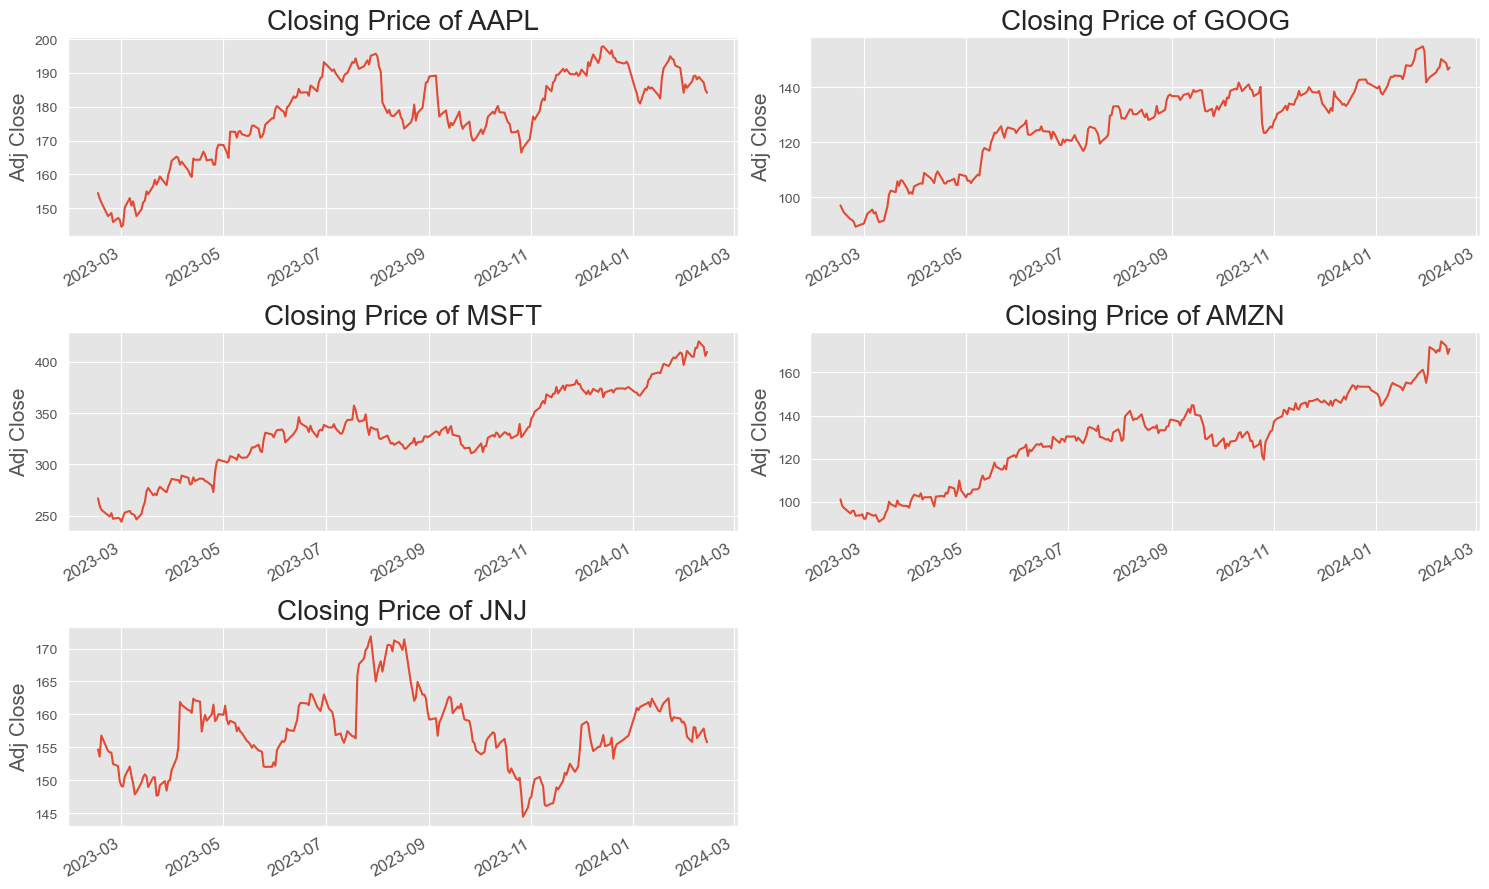

In [8]:
plt.style.use("ggplot")
plt.figure(figsize = (15,9))
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
# plt.subplots_adjust(top = 5,bottom = 1.)

for i,company in enumerate(company_list,1):
    plt.subplot(3,2,i)
    company['Adj Close'].plot(linewidth=1.5)
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")
    
plt.tight_layout()

### Sale of Equity

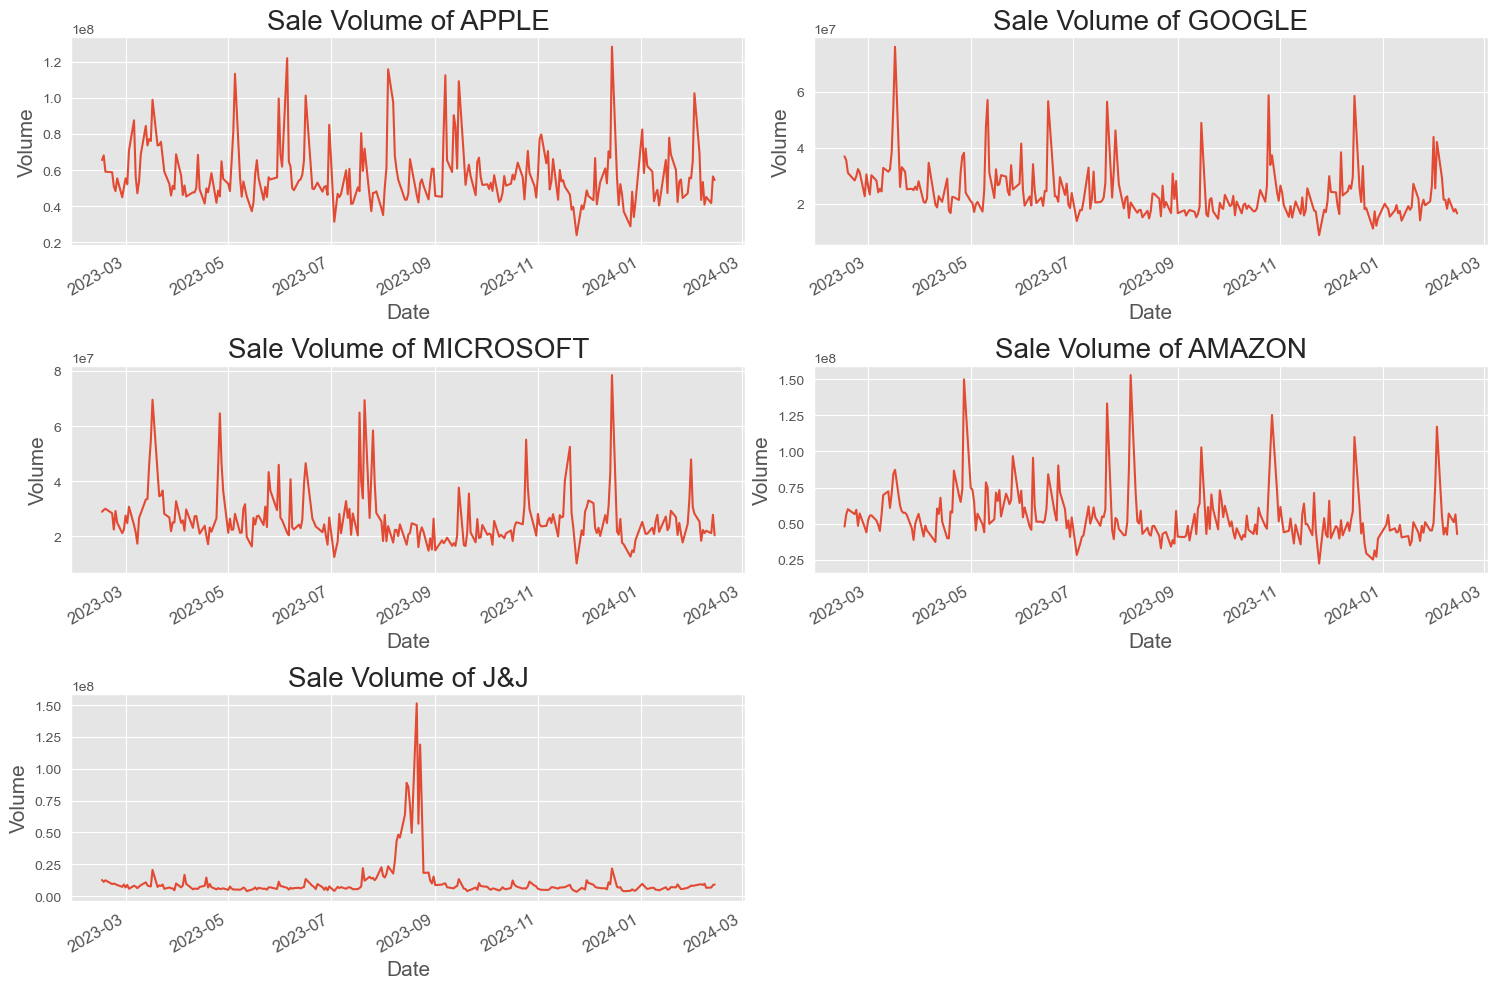

In [9]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top = 1.5,bottom = 1.0)
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels

for i, company in enumerate(company_list,1):
    plt.subplot(3,2,i)
    company['Volume'].plot(linewidth=1.5)
    plt.ylabel('Volume')
    plt.title(f"Sale Volume of {company_name[i-1]}")
    
plt.tight_layout()

## Moving Average of Stock 

**The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.**

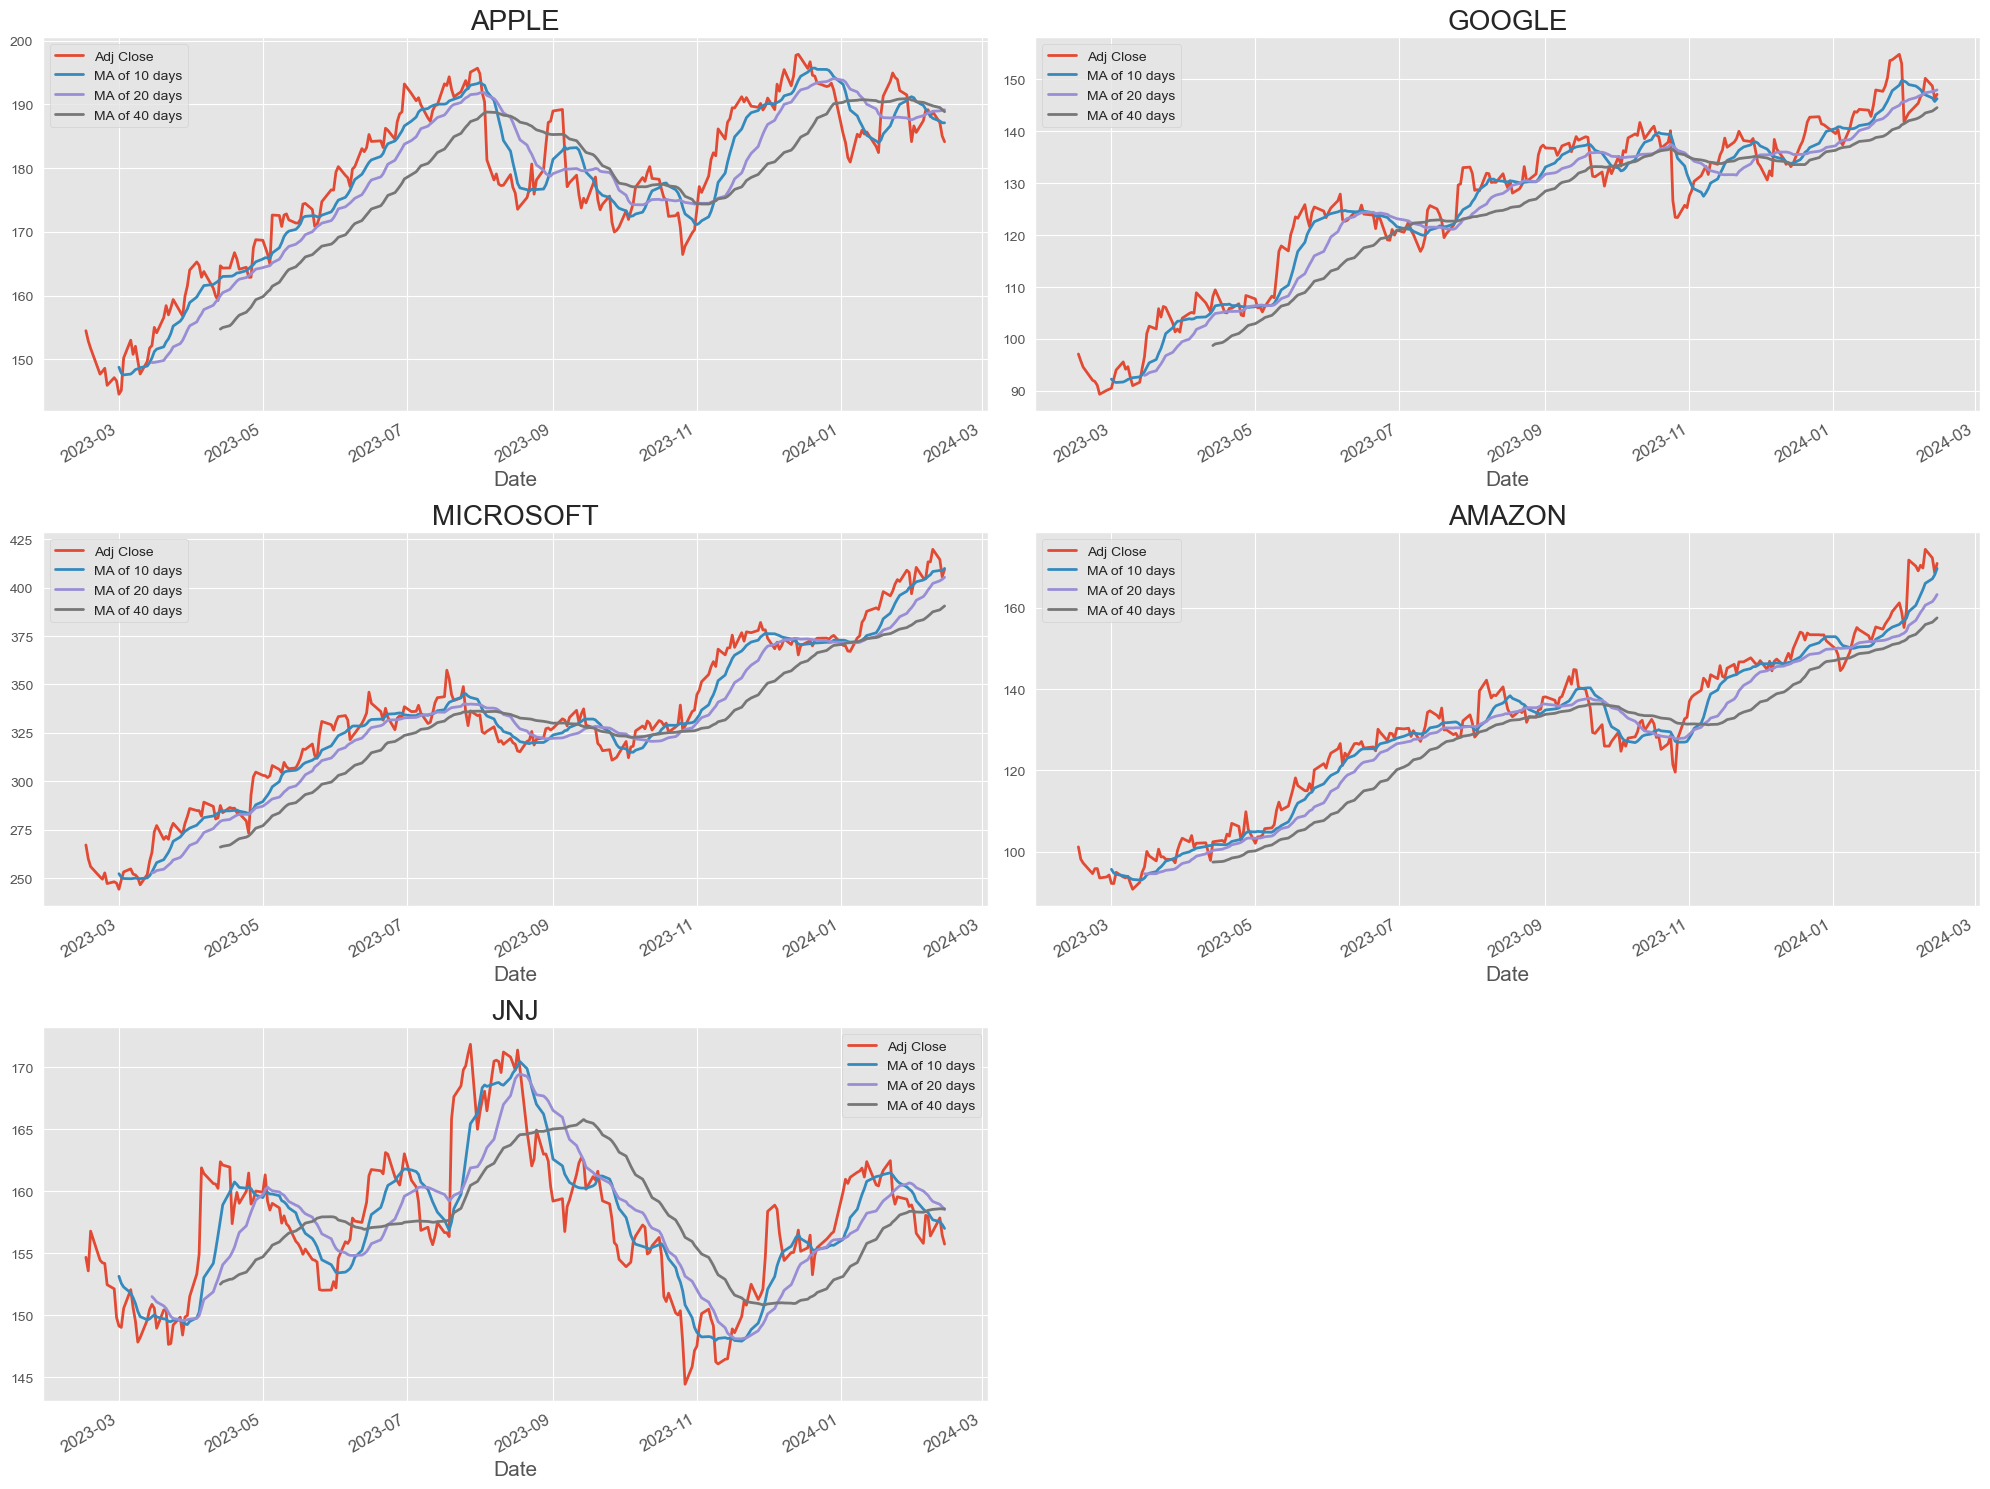

In [10]:
fig, axes = plt.subplots(nrows = 3,ncols = 2)
fig.set_figheight(15)
fig.set_figwidth(20)

MA_day = [10,20,40]

#company_list is list of indivisual variables of companies 
#company is each single comapny

for ma in MA_day:
    for company in company_list:
        column_name = f'MA of {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()


AAPL[['Adj Close','MA of 10 days','MA of 20 days','MA of 40 days']].plot(ax = axes[0,0],linewidth=2)
axes[0,0].set_title("APPLE")

GOOG[['Adj Close','MA of 10 days','MA of 20 days','MA of 40 days']].plot(ax = axes[0,1],linewidth=2)
axes[0,1].set_title("GOOGLE")

MSFT[['Adj Close','MA of 10 days','MA of 20 days','MA of 40 days']].plot(ax = axes[1,0],linewidth=2)
axes[1,0].set_title("MICROSOFT")

AMZN[['Adj Close','MA of 10 days','MA of 20 days','MA of 40 days']].plot(ax = axes[1,1],linewidth=2)
axes[1,1].set_title("AMAZON")

JNJ[['Adj Close','MA of 10 days','MA of 20 days','MA of 40 days']].plot(ax = axes[2,0],linewidth=2)
axes[2,0].set_title("JNJ")

fig.delaxes(axes[2][1])
fig.tight_layout()
        

# Daily Returns of The Stockes

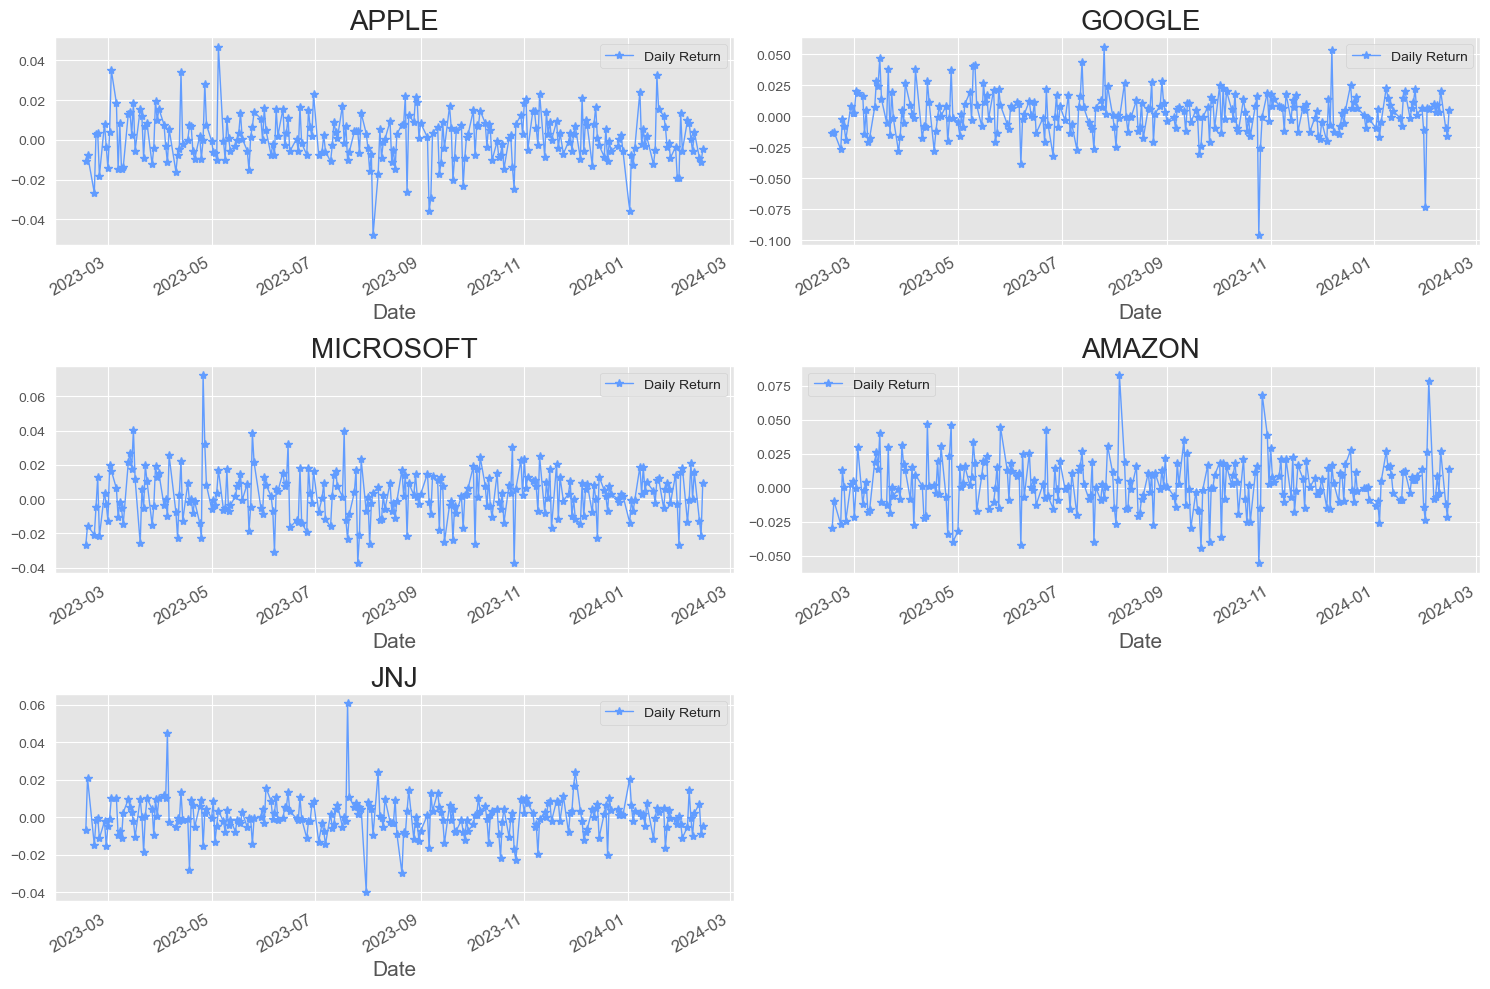

In [11]:
# %change = ((new-origina)/original)*100

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
    
# Plotting Daily Return

fig,axes = plt.subplots(nrows=3,ncols = 2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0]  ,legend = True, linewidth = 1, marker = '*',color = "#619CFF")
axes[0,0].set_title("APPLE")

GOOG['Daily Return'].plot(ax=axes[0,1],legend = True, linewidth = 1, marker = '*',color = "#619CFF")
axes[0,1].set_title("GOOGLE")
MSFT['Daily Return'].plot(ax=axes[1,0],legend = True, linewidth = 1, marker = '*',color = "#619CFF")
axes[1,0].set_title("MICROSOFT")
AMZN['Daily Return'].plot(ax=axes[1,1],legend = True, linewidth = 1, marker = '*',color = "#619CFF")
axes[1,1].set_title("AMAZON")
JNJ['Daily Return'].plot(ax=axes[2,0],legend = True, linewidth = 1, marker = '*',color = "#619CFF")
axes[2,0].set_title("JNJ")

plt.delaxes(axes[2][1])
plt.tight_layout()

Avearge Daily Return

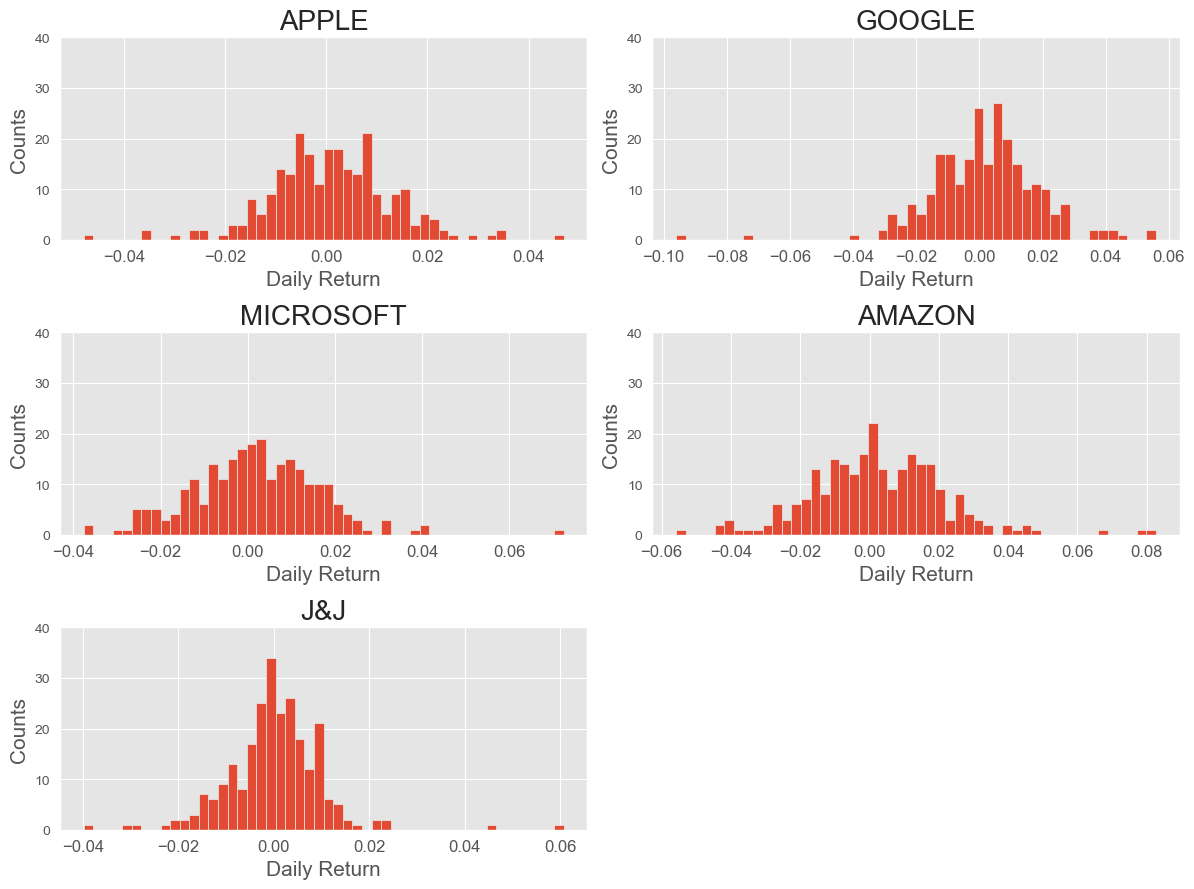

In [12]:
plt.figure(figsize = (12,9))


for i ,company in enumerate(company_list,1):
    plt.subplot(3,2,i)
    company['Daily Return'].hist(bins = 50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f"{company_name[i-1]}")
    plt.ylim((0,40))
    
plt.tight_layout()

# Correlation Between Different Closing Prices  

In [13]:
close_df = pdr.get_data_yahoo(tech_list,start = start,end=end)['Adj Close']

tech_returns = close_df.pct_change()
tech_returns.tail()


[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,JNJ,MSFT
Date,,,,,
2024-02-08,-0.005755,-0.004046,0.003682,-0.010001,0.000145
2024-02-09,0.004094,0.027143,0.020378,0.002302,0.015551
2024-02-12,-0.009002,-0.012095,-0.009919,0.006953,-0.012579
2024-02-13,-0.011274,-0.021469,-0.015868,-0.008743,-0.021529
2024-02-14,-0.004810,0.013876,0.005261,-0.004665,0.009665


c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


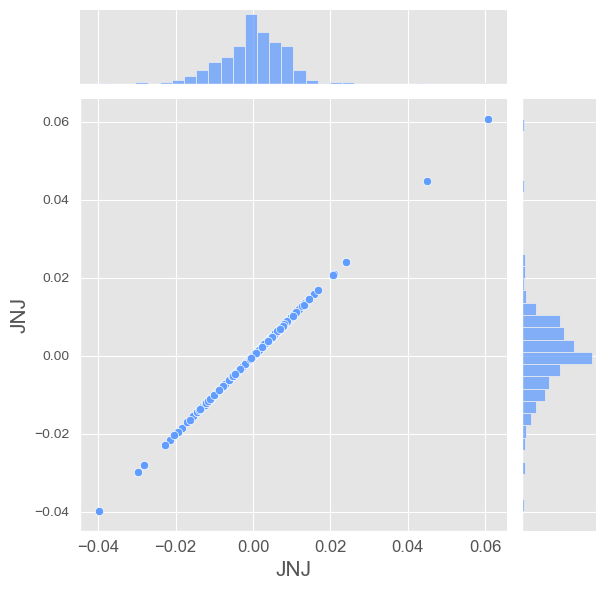

In [14]:
# To check relationship first compare stocks with itself to see if there
#exists a linear relationship
sns.jointplot(x='JNJ',y ='JNJ',data=tech_returns ,kind = 'scatter',color = '#619CFF')

c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


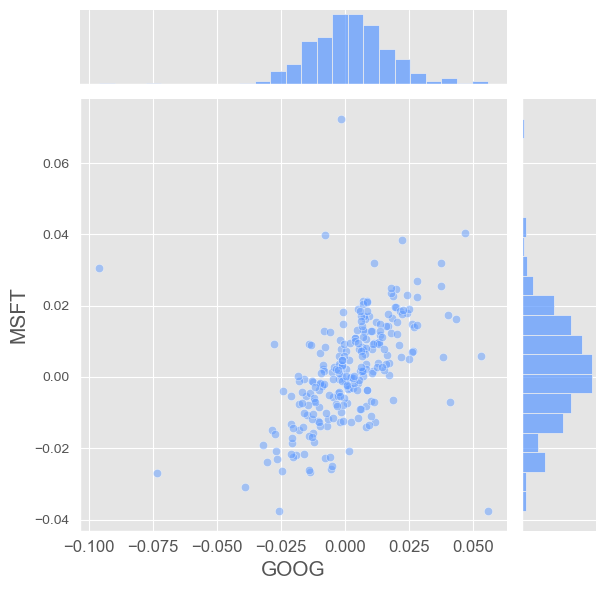

In [15]:
sns.jointplot(x="GOOG", y = 'MSFT', alpha = 0.5 ,data = tech_returns,kind = 'scatter',color ='#619CFF')

In [16]:
# For all comparisons

# sns.pairplot(tech_returns , kind = 'reg')

c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

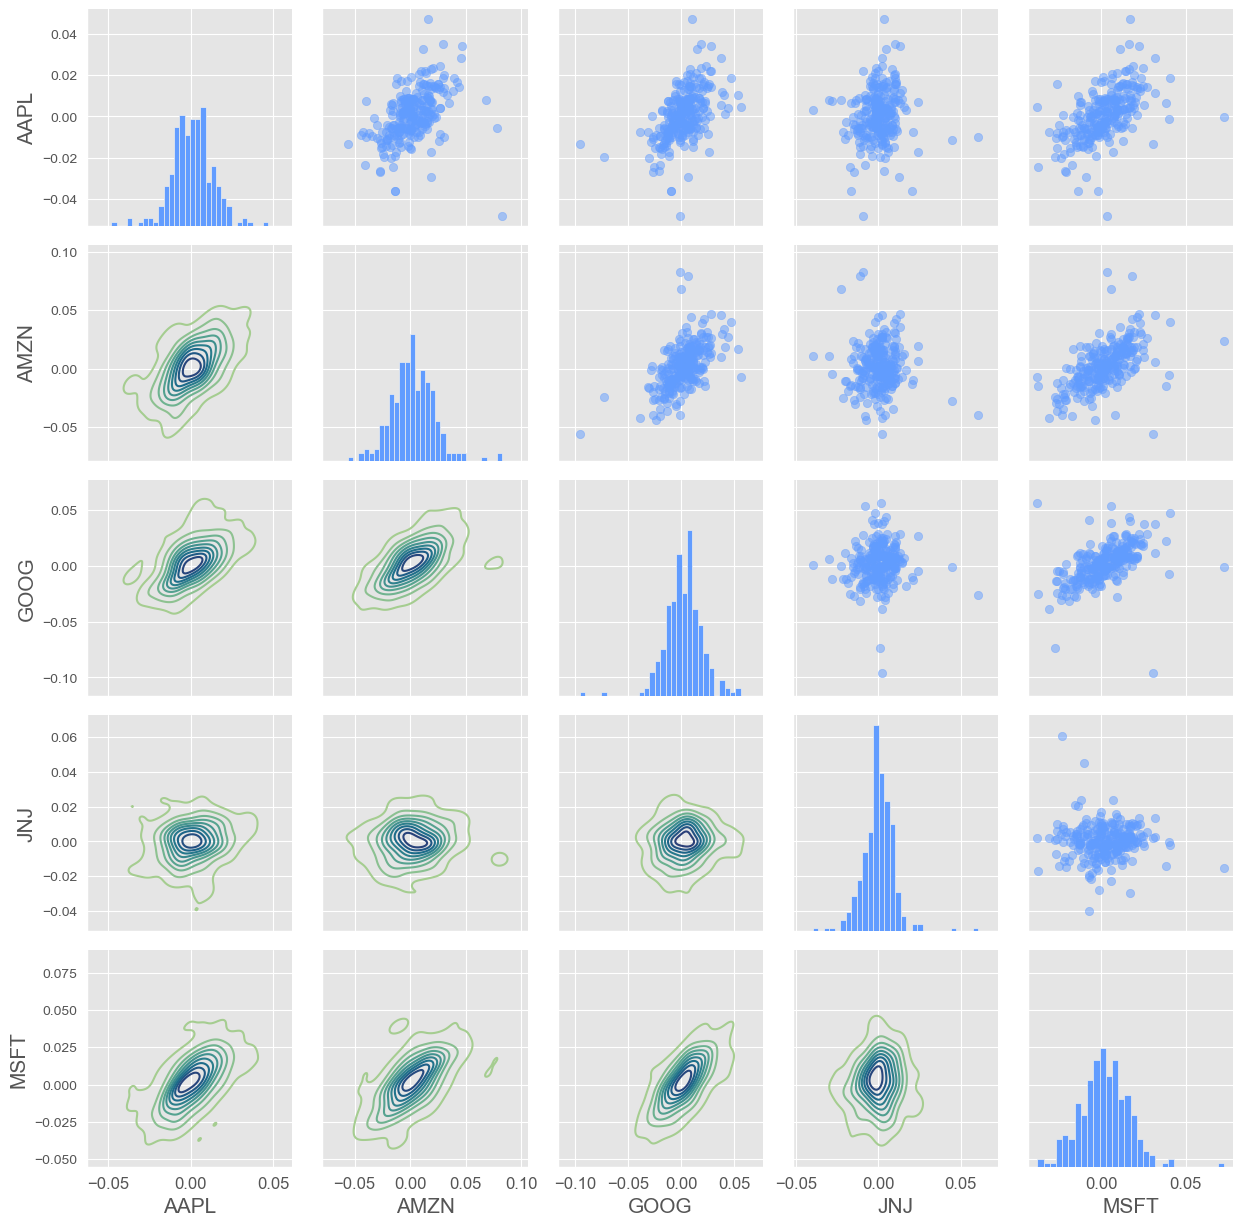

In [17]:
return_fig = sns.PairGrid(tech_returns.dropna())
return_fig.map_upper(plt.scatter,color = '#619CFF',alpha = 0.5)
return_fig.map_lower(sns.kdeplot,cmap = 'crest')
return_fig.map_diag(plt.hist,bins=30,color ='#619CFF')

c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\FORAM\anaconda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

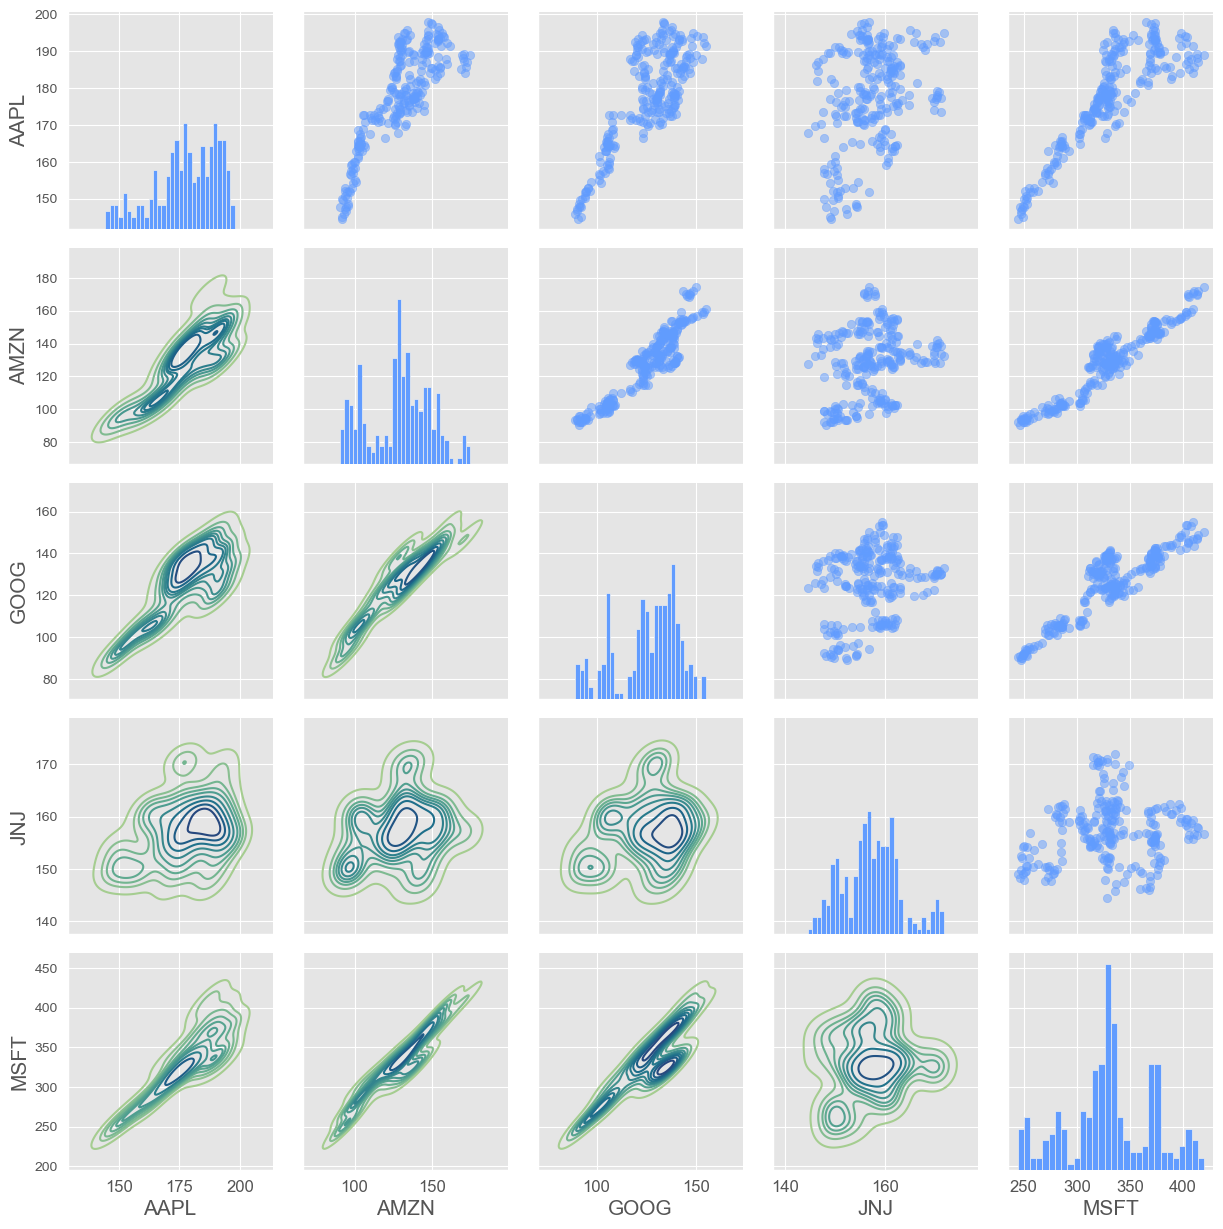

In [18]:
ret_fig = sns.PairGrid(close_df)

ret_fig.map_upper(plt.scatter,color='#619CFF', alpha = 0.5)
ret_fig.map_lower(sns.kdeplot,cmap = 'crest')
ret_fig.map_diag(plt.hist,bins = 30,color='#619CFF')

Text(0.5, 1.0, 'correlation of stock closeing prices')

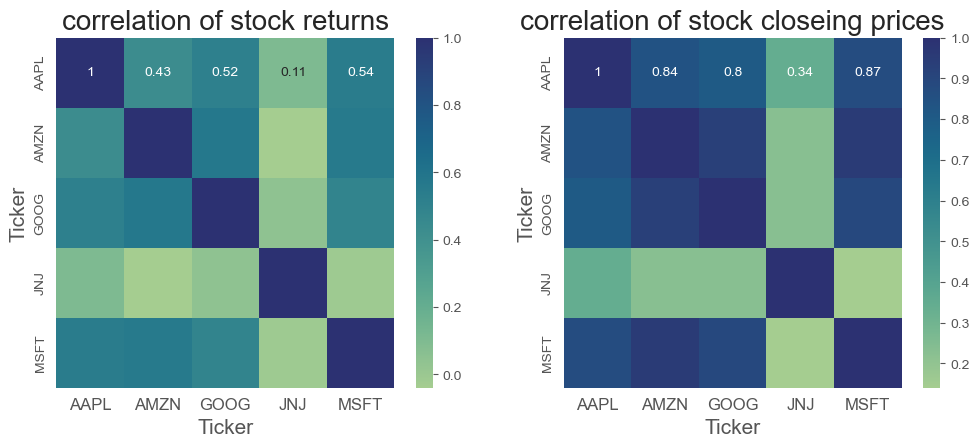

In [19]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.heatmap(tech_returns.corr(),annot=True,cmap='crest')
plt.title("correlation of stock returns")

plt.subplot(2,2,2)
sns.heatmap(close_df.corr(),annot = True, cmap='crest')
plt.title('correlation of stock closeing prices')